In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('fivethirtyeight')

In [3]:
bank_df=pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_df.shape

(10000, 14)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data visualization

In [7]:
def distribution(dataframe:pd.DataFrame,
                 colunm:str
                ):
    min_col=dataframe[colunm].min()
    max_col=dataframe[colunm].max()
    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=dataframe[dataframe['Exited']==1][colunm],
        histnorm='percent',
        name=True,
        xbins=dict( 
            start=min_col,
            end=max_col
        ),
        marker_color='red',
        opacity=0.75))
    fig.add_trace(go.Histogram(
        x=dataframe[dataframe['Exited']==0][colunm],
        histnorm='percent',
        name=False,
        xbins=dict(
            start=min_col,
            end=max_col
        ),
        marker_color='blue',
        opacity=0.75
    ))
    fig.update_layout(
        title_text=f'Distribution of {colunm} feature', 
        xaxis_title_text='Values', 
        yaxis_title_text='Percentage', 
        bargap=0.2, 
        bargroupgap=0.1 
    )
    fig.show()

In [8]:
distribution(bank_df, 'Age')

In [9]:
fig = px.histogram(bank_df, 
                   y="Gender", 
                   color='Exited', 
                   text_auto=True,
                   width=700,
                   height=300,
                   title='Exited by gender')
fig.show()
exit_by_gender=bank_df.groupby(['Exited','Gender'])['CustomerId'].count()
exit_by_gender_df=pd.DataFrame(exit_by_gender)
percent=[]
for c in exit_by_gender_df['CustomerId']:
    p=(c/bank_df.shape[0])*100
    percent.append(round(p))
exit_by_gender_df=exit_by_gender_df.rename(columns = {'CustomerId':'Customers'})
exit_by_gender_df['percent%']=percent
exit_by_gender_df.T

Exited         0            1     
Gender    Female  Male Female Male
Customers   3404  4559   1139  898
percent%      34    46     11    9

In [10]:
fig = px.histogram(bank_df, 
                   y="Geography", 
                   color='Exited', 
                   text_auto=True,
                   width=700,
                   height=300,
                   title='Exited by Geography')
fig.show()
exit_by_geography=bank_df.groupby(['Exited','Geography'])['CustomerId'].count()
exit_by_geography_df=pd.DataFrame(exit_by_geography)
percent=[]
for c in exit_by_geography_df['CustomerId']:
    p=(c/bank_df.shape[0])*100
    percent.append(round(p))
exit_by_geography_df=exit_by_geography_df.rename(columns = {'CustomerId':'Customers'})
exit_by_geography_df['percent%']=percent
exit_by_geography_df.T

Exited         0                    1              
Geography France Germany Spain France Germany Spain
Customers   4204    1695  2064    810     814   413
percent%      42      17    21      8       8     4

In [11]:
fig = px.imshow(round(bank_df.corr(),1),
                text_auto=True,
                title='Correlation Heatmap')
fig.show()

ExtraTreesClassifier Mode

Training & prediction

In [12]:
bank_df=bank_df.set_index('CustomerId')
X = bank_df.select_dtypes('number')
X=X.drop(columns=['Exited'])
y = bank_df[['Exited']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2) #random_state=42)

In [13]:
extraTrees=ExtraTreesClassifier(n_estimators=250, random_state=42)
extraTrees.fit(X_train, y_train['Exited'])
y_test_pred=extraTrees.predict(X_test)

In [14]:
df_test =y_test.copy()
df_test['y_test_pred']=y_test_pred

Model evaluation

In [15]:
def plot_confusion_matrix(dataframe:pd.DataFrame,
                          column1:str,
                          column2:str
                         ):
    tab=confusion_matrix(dataframe[column1], dataframe[column2])
    # print(tab)
    layout = {
        "title": "Confusion Matrix", 
        "xaxis": {"title": "Predicted value"}, 
        "yaxis": {"title": "Real value"}
    }
    fig = go.Figure(data=go.Heatmap(z=tab,
                                x=[0, 1],
                                y=[0, 1],
                                hoverongaps=False),
                layout=layout)
    fig.update_layout(
    width=400,
    height=400)
    fig.show()

In [16]:
print("\nAccuracy : %.2f"%accuracy_score(df_test['Exited'], df_test['y_test_pred']))
print("\nPrecision : %.2f"%precision_score(df_test['Exited'], df_test['y_test_pred']))
print("\nRecall : %.2f"%recall_score(df_test['Exited'], df_test['y_test_pred']))
plot_confusion_matrix(df_test, 'Exited', 'y_test_pred')
print("\nClassification Report : ")
print(classification_report(df_test['Exited'], df_test['y_test_pred']))


Accuracy : 0.85

Precision : 0.79

Recall : 0.39



Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.79      0.39      0.52       407

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.85      0.83      2000



Features importance

In [17]:
feat_importances = round(abs(pd.Series(extraTrees.feature_importances_, index=X.columns)).sort_values(),3)
importance_df=pd.DataFrame(feat_importances, columns=['importance'])
tab_importance=importance_df.nlargest(5, 'importance')

In [18]:
fig = px.bar(tab_importance, x=tab_importance.index, y='importance', text='importance')
fig.update_traces(texttemplate='%{text:.1}')
fig.update_layout(
    title_text='Top relevant Features', 
    xaxis_title_text='Importance',
    yaxis_title_text='Relevant Features'
)
fig.show()

Receiver Operating Characteristic

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)

In [21]:
roc_auc = metrics.auc(fpr, tpr)

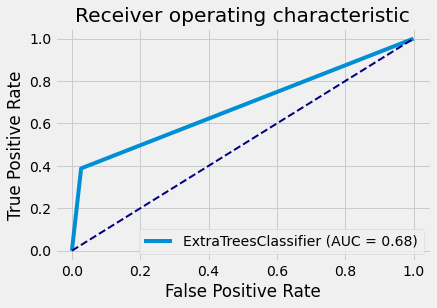

In [22]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ExtraTreesClassifier')
display.plot()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver operating characteristic")
plt.show()

AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.